In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import requests
import time
from datetime import datetime
import json

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Output File (CSV)
output_data_file = "Output/sentiments_df.csv"

In [2]:
# Target Search Term
target_user = ("@BBCBreaking", "@CBSNews", "@cnnbrk",
                "@FoxNews", "@nytimes")

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Loop through all target users
for target in target_user:

    # Variable for holding the oldest tweet
    oldest_tweet = None

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []


    # Loop through 5 times (total 100 most recent tweets per target_user)
    for x in range(5):

        # Run search around each tweet
        public_tweets = api.user_timeline(
            target, count=20, result_type="recent", max_id = oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets:


            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
                
        # Set the new oldest_tweet value
            oldest_tweet = tweet["id"] - 1

        # Add sentiments for each tweet into a list
            sentiments.append({"Newsfeed": target, "Date": tweet["created_at"], "Text": tweet["text"],  
                            "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg, 
                            "Tweets Ago": counter})
           
                # Add to counter 
            counter += 1
    
    # reset counter for the next loop through the next Newsfeed
    counter = 1

In [3]:
# display the DataFrame
sentiments_df = pd.DataFrame.from_dict(sentiments)
sentiments_df

,Compound,Date,Negative,Neutral,Newsfeed,Positive,Text,Tweets Ago
0,0.7067,Sun Sep 30 15:02:11 +0000 2018,0.796,0.000,@BBCBreaking,0.204,RT @5liveSport: That's it!\n\nMickelson hits t...,1
1,-0.7351,Sun Sep 30 06:52:14 +0000 2018,0.708,0.292,@BBCBreaking,0.000,At least 832 people now known to have died in ...,2
2,0.2732,Sat Sep 29 14:18:39 +0000 2018,0.812,0.066,@BBCBreaking,0.122,Senior Tory MPs have had their personal detail...,3
3,-0.5574,Sat Sep 29 07:33:05 +0000 2018,0.833,0.167,@BBCBreaking,0.000,At least 384 people now known to have died aft...,4
4,0.5574,Fri Sep 28 21:09:09 +0000 2018,0.833,0.000,@BBCBreaking,0.167,US President Donald Trump orders FBI to reopen...,5
5,0.5719,Fri Sep 28 18:04:12 +0000 2018,0.773,0.000,@BBCBreaking,0.227,Brett Kavanaugh's nomination to US Supreme Cou...,6
6,0.3400,Fri Sep 28 17:44:43 +0000 2018,0.902,0.000,@BBCBreaking,0.098,Facebook says the security flaw has been fixed...,7
7,0.0000,Fri Sep 28 17:08:56 +0000 2018,1.000,0.000,@BBCBreaking,0.000,"50 million Facebook accounts compromised, the ...",8
8,-0.2960,Fri Sep 28 15:55:27 +0000 2018,0.872,0.128,@BBCBreaking,0.000,Officers searching for missing Worcester stude...,9
9,0.0000,Fri Sep 28 12:54:18 +0000 2018,1.000,0.000,@BBCBreaking,0.000,Danish police seal off bridges and ferries to ...,10


In [4]:
# copy the results into the previously defined csv file
sentiments_df.to_csv(output_data_file, index=False, header=True)

In [5]:
# Split news data by source
BBC_df = sentiments_df[sentiments_df["Newsfeed"] == "@BBCBreaking"]
CBS_df = sentiments_df[sentiments_df["Newsfeed"] == "@CBSNews"]
CNN_df = sentiments_df[sentiments_df["Newsfeed"] == "@cnnbrk"]
FOX_df = sentiments_df[sentiments_df["Newsfeed"] == "@FoxNews"]
NYT_df = sentiments_df[sentiments_df["Newsfeed"] == "@nytimes"]


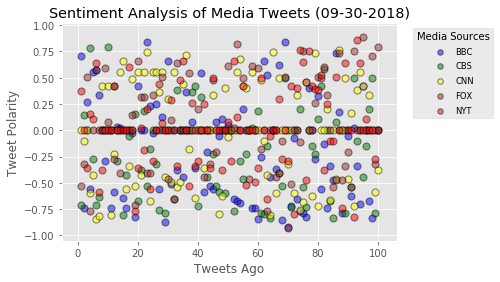

In [10]:
# Build the scatter plots for each newsfeed
plt.scatter(BBC_df["Tweets Ago"], BBC_df["Compound"], 
           s=50, c="blue", edgecolor="black", linewidths=1, 
           marker="o", alpha=0.5, label = "BBC")
plt.scatter(CBS_df["Tweets Ago"], CBS_df["Compound"], 
           s=50, c="green", edgecolor="black", linewidths=1, 
           marker="o", alpha=0.5, label = "CBS")
plt.scatter(CNN_df["Tweets Ago"], CNN_df["Compound"], 
           s=50, c="yellow", edgecolor="black", linewidths=1, 
           marker="o", alpha=0.5, label = "CNN")
plt.scatter(FOX_df["Tweets Ago"], FOX_df["Compound"], 
           s=50, c="brown", edgecolor="black", linewidths=1, 
           marker="o", alpha=0.5, label = "FOX")
plt.scatter(NYT_df["Tweets Ago"], NYT_df["Compound"], 
           s=50, c="red", edgecolor="black", linewidths=1, 
           marker="o", alpha=0.5, label = "NYT")

# Add title, x-axis and y-axis labels and legend
now = datetime.now()
now = now.strftime("%m-%d-%Y")
plt.title(f'Sentiment Analysis of Media Tweets ({now})')
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")


lgnd = plt.legend(fontsize="small", mode="Expanded", 
                 numpoints=1, scatterpoints=1, loc="upper right", 
                  bbox_to_anchor=(1.3, 1.0), title="Media Sources", 
                  labelspacing=0.7, ncol=1)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
lgnd.legendHandles[3]._sizes = [30]
lgnd.legendHandles[4]._sizes = [30]
# save the scatter plot in an images file and display the results
plt.savefig("Images/sentiments_scatter.png")
plt.show()


In [7]:
# compute the mean value of the compound sentiment metric for each media source
BBC_Compound_avg = BBC_df["Compound"].mean()
CBS_Compound_avg = CBS_df["Compound"].mean()
CNN_Compound_avg = CNN_df["Compound"].mean()
FOX_Compound_avg = FOX_df["Compound"].mean()
NYT_Compound_avg = NYT_df["Compound"].mean()

# assemble lists to hold values for the bar plot
Media_Compound_avg = [BBC_Compound_avg, CBS_Compound_avg, CNN_Compound_avg, 
                     FOX_Compound_avg, NYT_Compound_avg]
Media_List = ["BBC", "CBS", "CNN", "FOX", "NYT"]

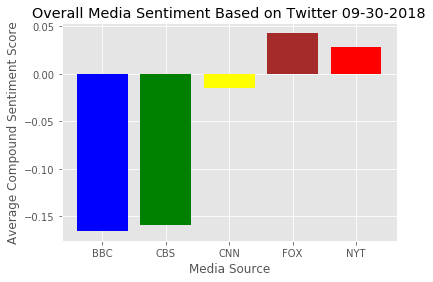

In [11]:
# Build bar plot using the average compound score for each media source
x_axis = np.arange(len(Media_List))
color_list = ["blue", "green", "yellow", "brown", "red"]
plt.bar(x_axis, Media_Compound_avg, color=color_list, align="center") 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Media_List)
plt.title(f'Overall Media Sentiment Based on Twitter {now}')
plt.xlabel("Media Source")
plt.ylabel("Average Compound Sentiment Score")
plt.savefig("Images/sentiments_bar.png")
plt.show()

In [12]:
## Observations Based on Above Analysis

# Based on the Bar Chart above:

# 1) CNN and the New York Times are, on average, the most sentiment neutral of the 5 media sources analyzed.

# 2) CBS is, on average, the most sentiment negative of the 5 media sources analyzed.

# 3) Fox News and BBC are, on average the most sentiment positive of the 5 media sources analyzed.

# The Scatter Plot is not of much value other than to show the high degree of variability
# for all 5 networks with a fairly balanced spread of positive and negative sentiments
# around a neutral axis, and hence the average values above are all fairly close to zero.
